OR :
Weights after training:  [1.0, 2.0]
Threshold after training:  0.01
0
1
1
1
AND :
Weights after training:  [1.1699999999999993, 0.6699999999999997]
Threshold after training:  1.1700000000000008
0
0
0
1
NOR :
Weights after training:  [-0.020000000000000753, -0.010000000000000753]
Threshold after training:  -0.03
1
1
1
0
NAND :
Weights after training:  [-7.528699885739343e-16, -1.6410484082740595e-15]
Threshold after training:  -8.673617379884035e-17
1
0
0
0


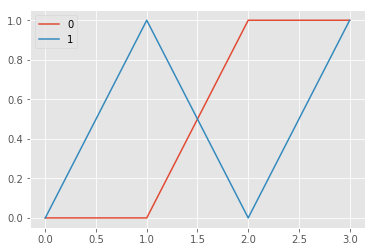

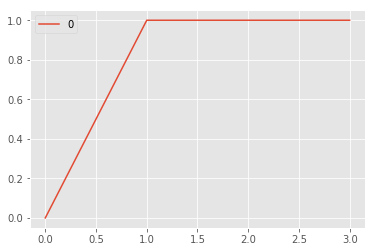

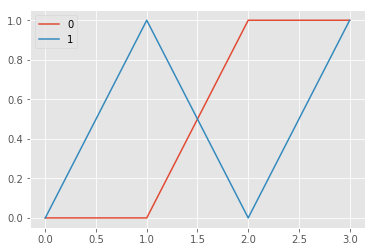

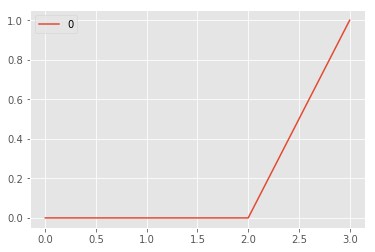

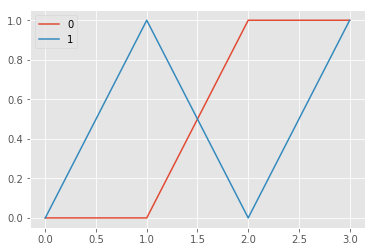

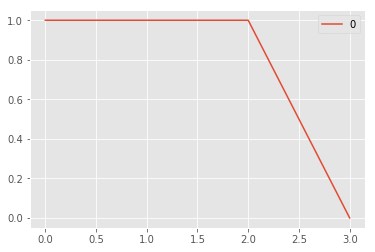

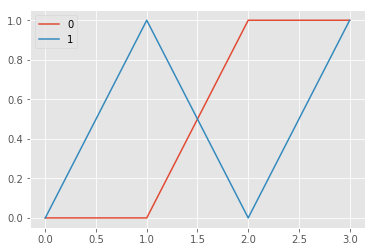

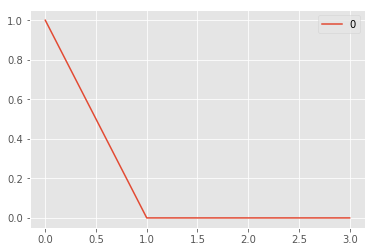

In [64]:
#Perceptron model to implement basic gates
import random 
import pandas as pd
from matplotlib import style
import numpy as np
from matplotlib import pyplot as plt
style.use('ggplot')

class perceptron:
  l_rate = 0.01             #Learning Rate
  inputs = 2                #Number of inputs = I
  sum = 0                   #Sum = I1*W1 + I2*W2 
  weights = []              #weights = W
  threshold = 0             #Threshold value
  
  
  def __init__(self,inputs,threshold,l_rate):
    self.l_rate = l_rate
    self.inputs = inputs
    self.threshold = threshold
    
    #generating random numbers for initial weights
    self.weights = [random.randint(1,2),random.randint(1,2)]      
  
  #Function for checking activation of the perceptron  
  def activation_check(self):
    return bool(self.sum >= self.threshold)   #Compares the sum with threshold and returns True or False 
  
  #Function to calculate weighted sum
  def weighted_sum(self,I):
    #Loop to calculate weighted sum Sum = I1*W1 + I2*W2 
    for i in range(self.inputs):
      self.sum += self.weights[i]*I[i]
  
  
  #Function to train the data
  def train(self,Y,I,iters):
    
    for i in range(iters):
      #setting sum to 0
      self.sum = 0
      
      #Finding the weighted sum and checking wether sum crossed threshold 
      self.weighted_sum(I[i%4])
      y = int(self.activation_check())
      
      #Calculating error in the activation from the desired result
      error = Y[i%4] - y
      
      delWeight = []
      
      #Calculating dW which is change in the weights needed to be added
      delWeight = [self.l_rate * error * I[i%4][0],self.l_rate * error * I[i%4][1]]
      #delWeight = self.l_rate * error * I[i%4][1]
      
      #Updating the self weights
      self.weights[0] += delWeight[0]
      self.weights[1] += delWeight[1]
      
      #Updating threshold value
      self.threshold = -(-self.threshold + self.l_rate * error)
    
    print("Weights after training: ",self.weights)
    print("Threshold after training: ",self.threshold)
  
  #Function to test the perceptron model  
  def test(self,I):
    
    self.sum = 0
    self.weighted_sum(I)
    x = self.activation_check()
    print(int(x))
    


#OR GATE Implementation
print("OR :")
I = [(0,0),(0,1),(1,0),(1,1)]
#Plotting the input 
p = pd.DataFrame(I)
p.plot()

Y = [0,1,1,1]
#Plotting the output 
p = pd.DataFrame(Y)
p.plot()

OrPerceptron = perceptron(2,0,0.01)

OrPerceptron.train(Y,I,10000)

OrPerceptron.test((0,0))
OrPerceptron.test((0,1))
OrPerceptron.test((1,0))
OrPerceptron.test((1,1))


#AND GATE Implementation
print("AND :")
I = [(0,0),(0,1),(1,0),(1,1)]
#Plotting the output 
p = pd.DataFrame(I)
p.plot()

Y = [0, 0, 0, 1]
#Plotting the output 
p = pd.DataFrame(Y)
p.plot()

AndPerceptron = perceptron(2,0,0.01)

AndPerceptron.train(Y,I,10000)

AndPerceptron.test((0,0))
AndPerceptron.test((0,1))
AndPerceptron.test((1,0))
AndPerceptron.test((1,1))


#NOR GATE Implementation
print("NOR :")
I = [(0,0),(0,1),(1,0),(1,1)]
#Plotting the output 
p = pd.DataFrame(I)
p.plot()

Y = [1, 1, 1, 0]
#Plotting the output 
p = pd.DataFrame(Y)
p.plot()

NorPerceptron = perceptron(2,0,0.01)

NorPerceptron.train(Y,I,10000)

NorPerceptron.test((0,0))
NorPerceptron.test((0,1))
NorPerceptron.test((1,0))
NorPerceptron.test((1,1))


#NAND GATE Implementation
print("NAND :")
I = [(0,0),(0,1),(1,0),(1,1)]
#Plotting the output 
p = pd.DataFrame(I)
p.plot()

Y = [1, 0, 0, 0]
#Plotting the output 
p = pd.DataFrame(Y)
p.plot()

NandPerceptron = perceptron(2,0,0.01)

NandPerceptron.train(Y,I,10000)

NandPerceptron.test((0,0))
NandPerceptron.test((0,1))
NandPerceptron.test((1,0))
NandPerceptron.test((1,1))